<a href="https://colab.research.google.com/github/ola-sumbo/Hamoye-Internship/blob/master/AXA_Vehicle_Insurance_Claim_'OlasumboB'_0_4256.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries for Visualisation and ML**

In [5]:
#for data visualization
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
import missingno as mssno
seed=45

In [6]:
#for ML
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle

**Data Loading and Preparation**
We load our data and explore data, this time separately

In [9]:
from google.colab import files
uploaded = files.upload()

Saving SampleSubmission.csv to SampleSubmission.csv


In [51]:
train = pd.read_csv('/content/Train (1).csv')
test = pd.read_csv('/content/Test (1).csv')

In [52]:
ss = pd.read_csv('/content/SampleSubmission.csv')

In [53]:
# join train and test together
ntrain = train.shape[0]
ntest = test.shape[0]

In [54]:
#Displaying Files
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [55]:
# display test
test.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,009D84L,2010-04-24,2011-03-27,NO GENDER,25,2010-04-24,1,NaN,As Attached,Iveco,Victoria Island,Lagos,CVTP
1,01DO2EQ,2010-01-01,2010-12-31,NaN,120,2010-01-01,4,NaN,As Attached,TOYOTA,Victoria Island,Lagos,Muuve
2,01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
3,024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic
4,02BYET3,2010-09-16,2010-12-31,NaN,120,2010-09-16,4,NaN,NaN,TOYOTA,Victoria Island,Lagos,Muuve


In [56]:
#Number of rows and columns
train.shape
#test.shape

(12079, 14)

In [57]:
#Description
train.describe()

,Age,No_Pol,target
count,12079.000000,12079.000000,12079.000000
mean,42.234539,1.307227,0.120457
std,97.492565,0.733085,0.325509
min,-6099.000000,1.000000,0.000000
25%,35.000000,1.000000,0.000000
50%,41.000000,1.000000,0.000000
75%,50.000000,1.000000,0.000000
max,320.000000,10.000000,1.000000


In [58]:
#Data Types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [59]:
all_data = pd.concat((train, test)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (17256, 14)


**Finding Null Values in the dataset**

In [60]:
#Finding the nul values as null value and filling with interpolate
all_data.isnull().sum()
all_data = all_data.interpolate()

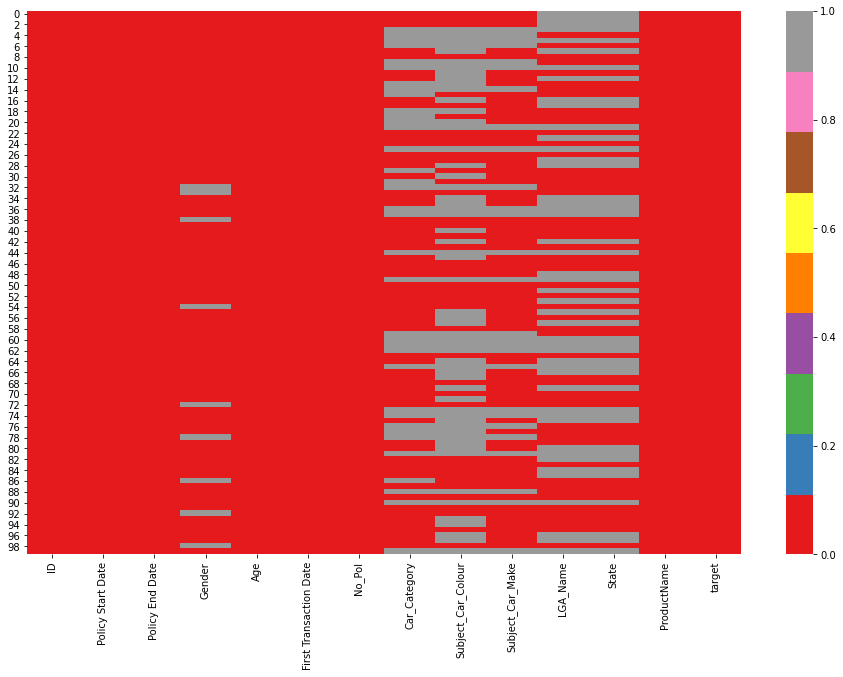

In [21]:
#Heat map for Null Values
plt.figure(figsize=(16,10))
sns.heatmap(all_data.head(100).isnull() == True, cmap='Set1')

In [61]:
# Code to get number of categories in missing value columns
print("Number of Categories in: ")
for ColName in all_data[['State','Gender','Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make','LGA_Name','target']]:
  print("{} = {}".format(ColName, len(all_data[ColName].unique())))

Number of Categories in: 
State = 114
Gender = 8
Car_Category = 17
Subject_Car_Colour = 47
Subject_Car_Make = 76
LGA_Name = 271
target = 2


In [62]:
all_data.target.unique()

array([0., 1.])

In [63]:
#Frequent Categorical Imputation
#1. Function to replace NAN values with mode value
def impute_nan_most_frequent_category(Dataframe,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=Dataframe[ColName].mode()[0]
    
    # replace nan values with most occured category
     Dataframe[ColName + "_Imputed"] = Dataframe[ColName]
     Dataframe[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)

In [64]:
#2. Call function to impute most occured category
for Columns in ['State','Gender','Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make','LGA_Name','target']:
  impute_nan_most_frequent_category(all_data,Columns)
    
# Display imputed result
all_data[['State','State_Imputed','Gender','Gender_Imputed','Car_Category', 'Car_Category_Imputed', 'Subject_Car_Colour','Subject_Car_Colour_Imputed','Subject_Car_Make','Subject_Car_Make_Imputed','LGA_Name','LGA_Name_Imputed','target', 'target_Imputed']].head(10)

,State,State_Imputed,Gender,Gender_Imputed,Car_Category,Car_Category_Imputed,Subject_Car_Colour,Subject_Car_Colour_Imputed,Subject_Car_Make,Subject_Car_Make_Imputed,LGA_Name,LGA_Name_Imputed,target,target_Imputed
0,NaN,Lagos,Male,Male,Saloon,Saloon,Black,Black,TOYOTA,TOYOTA,NaN,Victoria Island,0.0,0.0
1,NaN,Lagos,Female,Female,JEEP,JEEP,Grey,Grey,TOYOTA,TOYOTA,NaN,Victoria Island,1.0,1.0
2,NaN,Lagos,Male,Male,Saloon,Saloon,Red,Red,TOYOTA,TOYOTA,NaN,Victoria Island,0.0,0.0
3,NaN,Lagos,Male,Male,NaN,Saloon,NaN,Black,NaN,TOYOTA,NaN,Victoria Island,0.0,0.0
4,Lagos,Lagos,Entity,Entity,NaN,Saloon,NaN,Black,NaN,TOYOTA,Lagos,Lagos,1.0,1.0
5,NaN,Lagos,Male,Male,NaN,Saloon,NaN,Black,NaN,TOYOTA,NaN,Victoria Island,0.0,0.0
6,Lagos,Lagos,Female,Female,NaN,Saloon,NaN,Black,NaN,TOYOTA,Ikeja,Ikeja,0.0,0.0
7,NaN,Lagos,Male,Male,Saloon,Saloon,NaN,Black,TOYOTA,TOYOTA,NaN,Victoria Island,0.0,0.0
8,Benue,Benue,Female,Female,JEEP,JEEP,Black,Black,REXTON,REXTON,Badagry,Badagry,0.0,0.0
9,Eti-Osa,Eti-Osa,Female,Female,NaN,Saloon,NaN,Black,NaN,TOYOTA,Eti-Osa,Eti-Osa,0.0,0.0


In [65]:
#3. Drop actual columns
all_data = all_data.drop(['State','Gender','Car_Category', 'Subject_Car_Colour','target' ,'Subject_Car_Make','LGA_Name'], axis = 1)

In [66]:
all_data.isnull().sum()

ID                            0
Policy Start Date             0
Policy End Date               0
Age                           0
First Transaction Date        0
No_Pol                        0
ProductName                   0
State_Imputed                 0
Gender_Imputed                0
Car_Category_Imputed          0
Subject_Car_Colour_Imputed    0
Subject_Car_Make_Imputed      0
LGA_Name_Imputed              0
target_Imputed                0
dtype: int64

**Data Visualization**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


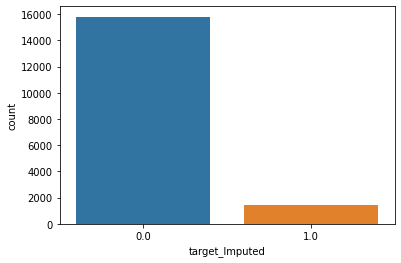

In [67]:
sns.countplot(all_data.target_Imputed)

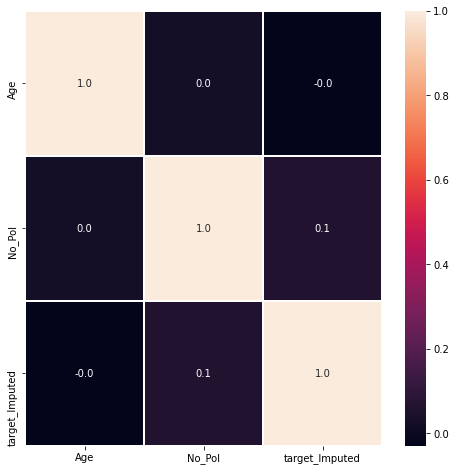

In [ ]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(all_data.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()

In [68]:
date_col = ['Policy Start Date','Policy End Date','First Transaction Date']
num_col = ['Age', 'No_Pol']
id_col = ['ID']
cat_col = [col for col in all_data.columns if col not in date_col+num_col+id_col]
cat_col

['ProductName',
 'State_Imputed',
 'Gender_Imputed',
 'Car_Category_Imputed',
 'Subject_Car_Colour_Imputed',
 'Subject_Car_Make_Imputed',
 'LGA_Name_Imputed',
 'target_Imputed']

In [69]:
def check_categorical_relationship(cat_col,y_col,df):
    for feat in cat_col:
        plt.figure(figsize=(20,5))
        sns.barplot(df[feat],df[y_col])
        plt.show()
        print("\n \n \n ")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


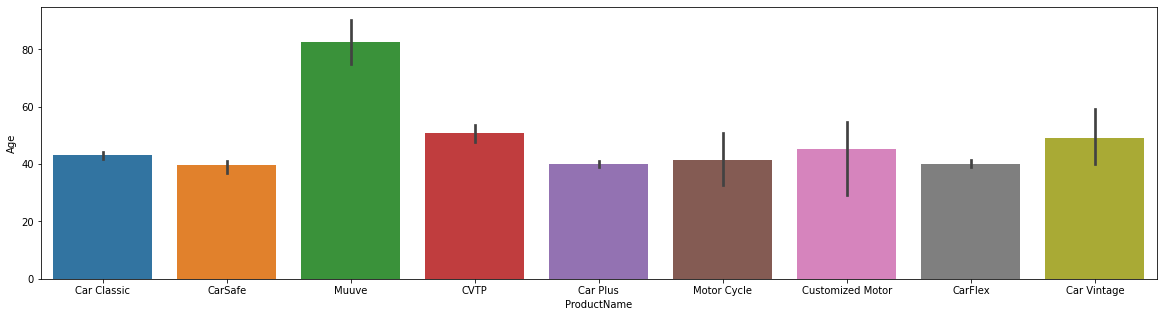

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


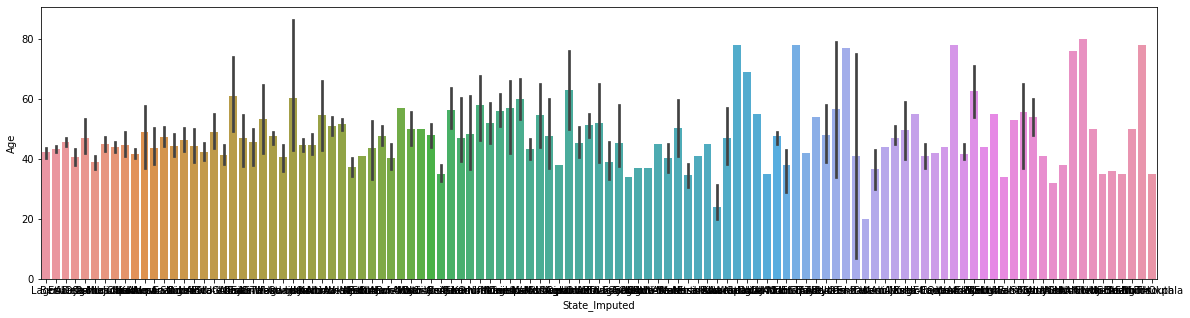

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


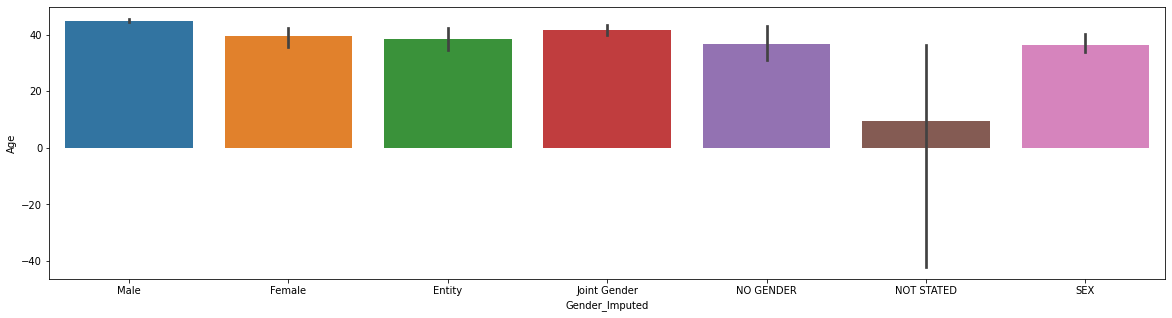

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


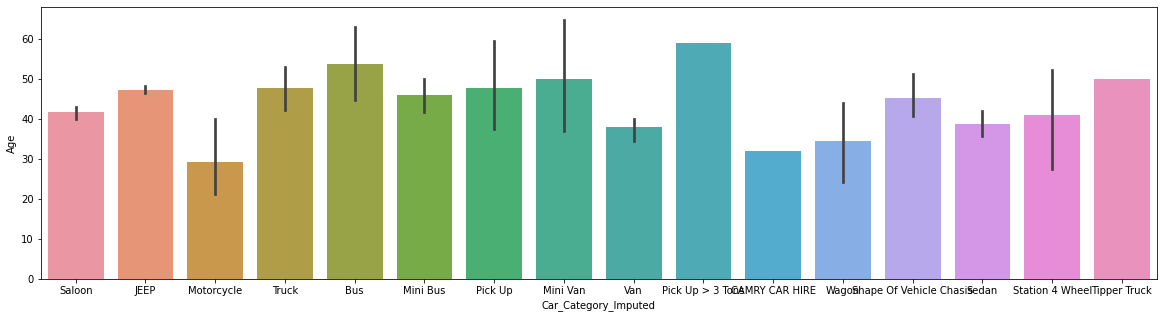

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


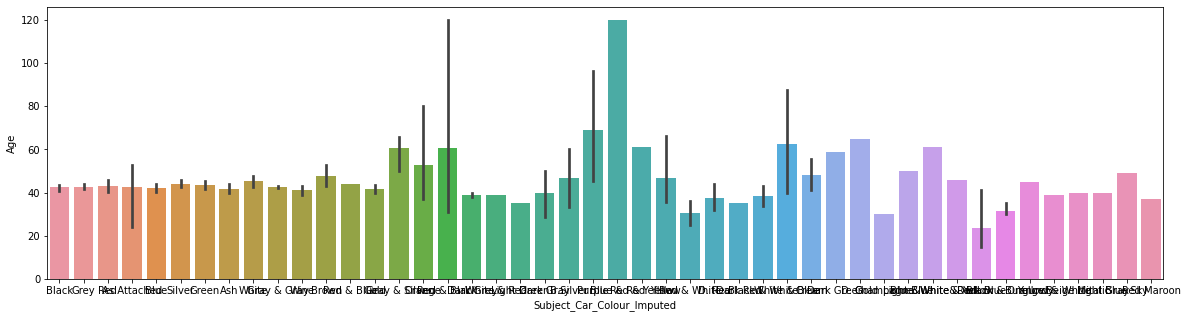

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


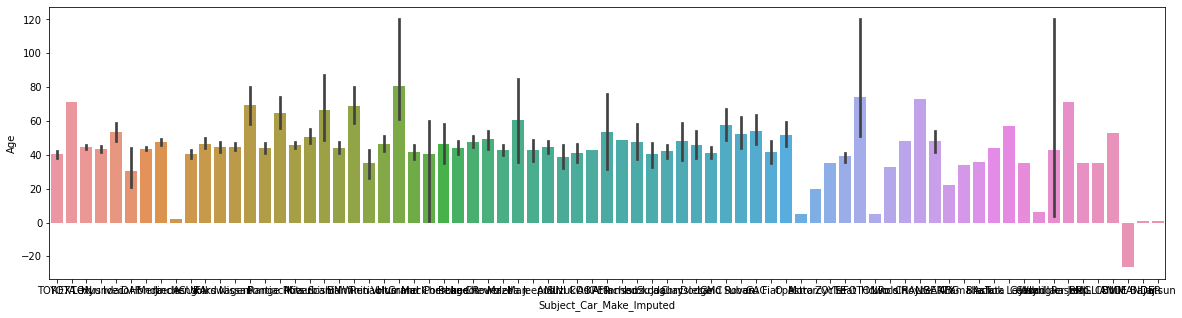

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


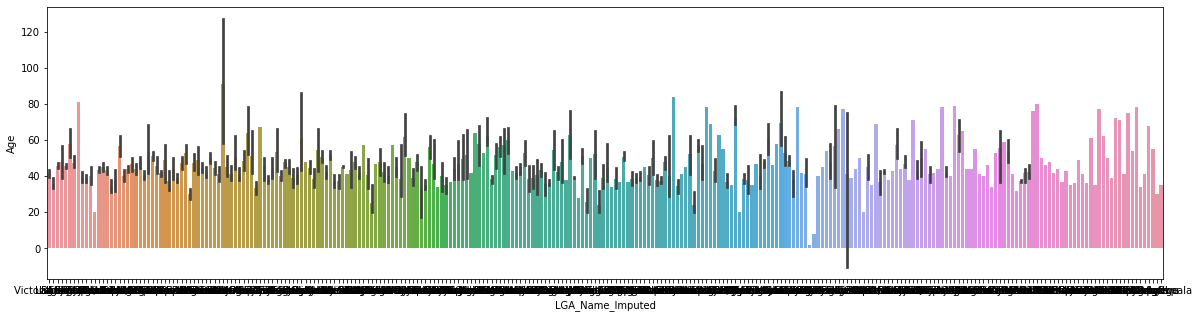

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


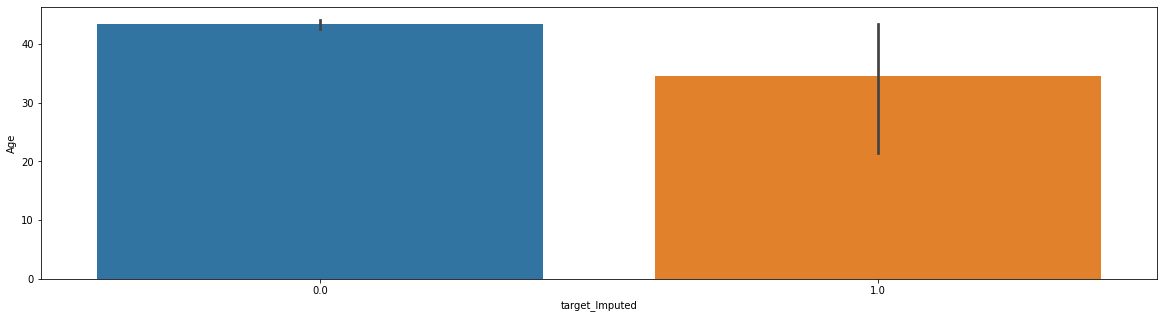

In [36]:
check_categorical_relationship(cat_col,'Age',all_data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


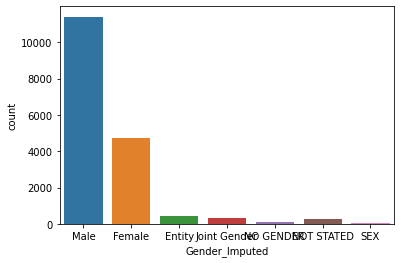

In [70]:
# Gender distribution 
sns.countplot(all_data.Gender_Imputed)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

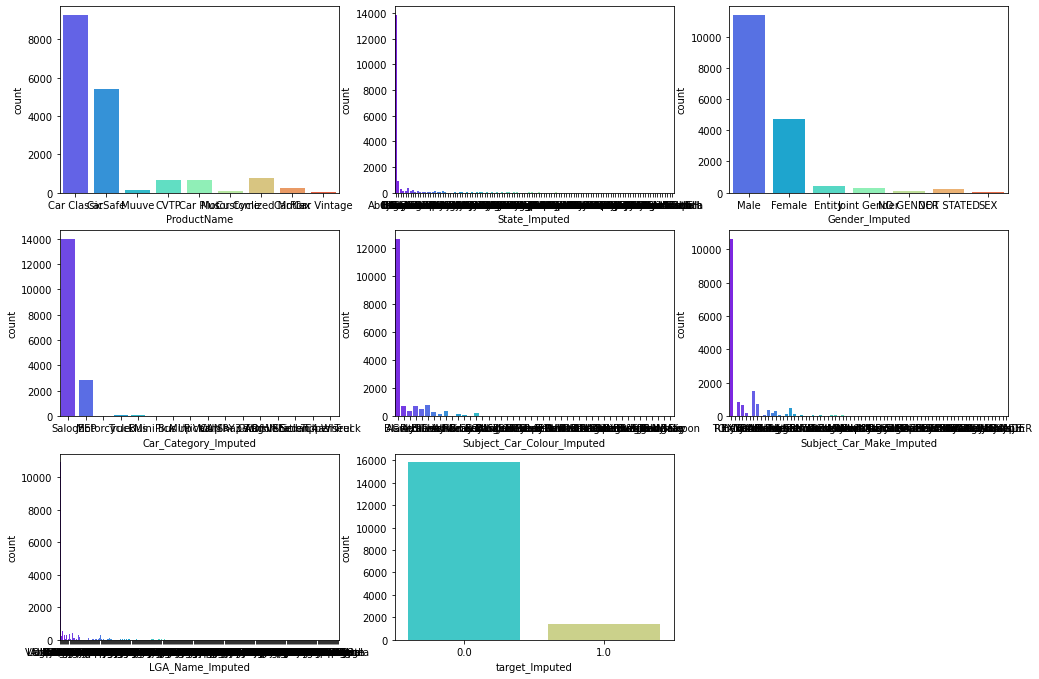

In [71]:
#Categorical values visualization
plt.figure(figsize=(17,24))
for i, c in enumerate(cat_col):
    ax = plt.subplot(6,3,i+1)
    sns.countplot(all_data[c],palette='rainbow')

In [72]:
all_data.Gender_Imputed.unique()

array(['Male', 'Female', 'Entity', 'Joint Gender', 'NO GENDER',
       'NOT STATED', 'SEX'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


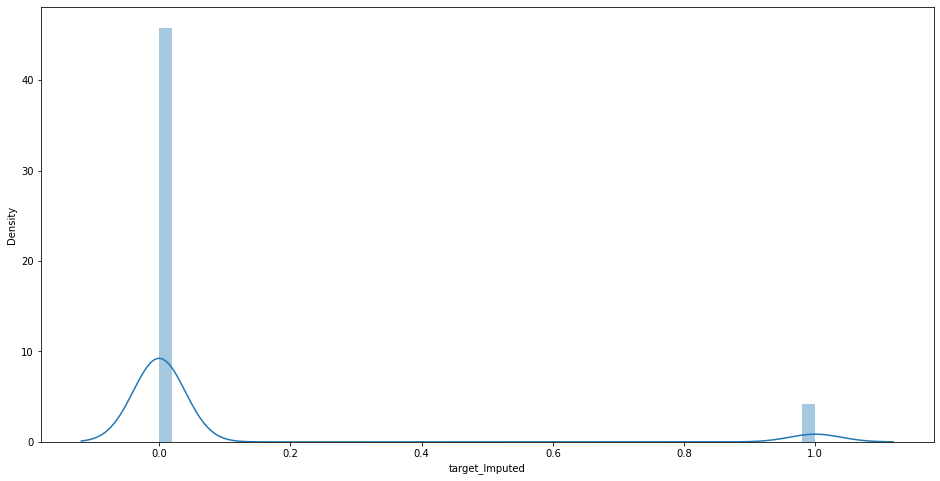

In [73]:
import seaborn as sns
plt.figure(figsize=(16, 8))
sns.distplot(all_data["target_Imputed"])

**Basic Data Pre-Processing**

In [74]:
date_col

['Policy Start Date', 'Policy End Date', 'First Transaction Date']

In [75]:
for feat in date_col:
    all_data[feat] = pd.to_datetime(all_data[feat])

In [76]:
import datetime
def extract_date_info(df,cols,):
    for feat in cols:
        df[feat +'_year'] = df[feat].dt.quarter
        df[feat +'_day'] = df[feat].dt.day
        df[feat +'_month'] = df[feat].dt.month
        df[feat +'_quarter'] = df[feat].dt.quarter
    df.drop(columns=date_col,axis=1,inplace=True)

In [77]:
extract_date_info(all_data,date_col)

In [78]:
all_data

,ID,Age,No_Pol,ProductName,State_Imputed,Gender_Imputed,Car_Category_Imputed,Subject_Car_Colour_Imputed,Subject_Car_Make_Imputed,LGA_Name_Imputed,target_Imputed,Policy Start Date_year,Policy Start Date_day,Policy Start Date_month,Policy Start Date_quarter,Policy End Date_year,Policy End Date_day,Policy End Date_month,Policy End Date_quarter,First Transaction Date_year,First Transaction Date_day,First Transaction Date_month,First Transaction Date_quarter
0,0040R73,30,1,Car Classic,Lagos,Male,Saloon,Black,TOYOTA,Victoria Island,0.0,2,14,5,2,2,13,5,2,2,14,5,2
1,0046BNK,79,1,Car Classic,Lagos,Female,JEEP,Grey,TOYOTA,Victoria Island,1.0,4,29,11,4,4,28,11,4,4,29,11,4
2,005QMC3,43,1,Car Classic,Lagos,Male,Saloon,Red,TOYOTA,Victoria Island,0.0,1,21,3,1,1,20,3,1,1,21,3,1
3,0079OHW,2,1,CarSafe,Lagos,Male,Saloon,Black,TOYOTA,Victoria Island,0.0,3,21,8,3,3,20,8,3,3,21,8,3
4,00BRP63,20,3,Muuve,Lagos,Entity,Saloon,Black,TOYOTA,Lagos,1.0,3,29,8,3,4,31,12,4,3,29,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17251,ZYXX5AF,48,1,CarSafe,Lagos,Male,Saloon,Black,Honda,Victoria Island,0.0,3,18,7,3,3,17,7,3,3,18,7,3
17252,ZYYOZ5L,50,1,Car Classic,Lagos,Male,Saloon,Black,TOYOTA,Victoria Island,0.0,4,4,12,4,4,3,12,4,4,4,12,4
17253,ZZ1GTKD,1,1,CarSafe,Lagos,Male,Saloon,Black,TOYOTA,Victoria Island,0.0,3,24,9,3,3,23,9,3,3,24,9,3
17254,ZZDXQSI,52,1,Car Classic,Lagos,Female,Saloon,Grey,TOYOTA,Victoria Island,0.0,3,17,7,3,3,16,7,3,3,17,7,3


**Pre-processing Gender**

In [79]:
all_data.Gender_Imputed.unique()

array(['Male', 'Female', 'Entity', 'Joint Gender', 'NO GENDER',
       'NOT STATED', 'SEX'], dtype=object)

In [80]:
mapper = {"Male":"M","Female":'F','Entity':'O','Joint Gender':'O','NO GENDER':'O','NOT STATED':'O','SEX':'O'}
# M for Male, F for Female and O for Others

In [81]:
all_data.Gender = all_data.Gender_Imputed.map(mapper)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [82]:
all_data.Gender.unique()

array(['M', 'F', 'O'], dtype=object)

In [ ]:
# pd.get_dummies(all_data)

**Creat Base model**

In [83]:
#Check the distribution of variables
all_data.target = all_data.target_Imputed.astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [84]:
all_data.drop(columns=['ID'],inplace=True)

In [85]:
#Get the new dataset
train_n = all_data[:ntrain]
test_n = all_data[ntrain:]

In [87]:
desired_apriori=0.10

# Get the indices per target value
idx_0 = train_n[train_n.target_Imputed == 0].index
idx_1 = train_n[train_n.target_Imputed == 1].index

# Get original number of records per target value
nb_0 = len(train_n.loc[idx_0])
nb_1 = len(train_n.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_1 = int(undersampling_rate*nb_1)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=1 after undersampling: {}'.format(undersampled_nb_1))

# Randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_1)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)


Rate to undersample records with target=0: 1.232586596385542
Number of records with target=1 after undersampling: 1793


In [88]:
# Return undersample data frame
train_n = train_n.loc[idx_list].reset_index(drop=True)

In [89]:
test_n.drop("target_Imputed",axis = 1,inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [90]:
X= train_n.drop(columns=['target_Imputed'])
y= train_n.target_Imputed

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [92]:
test_n.columns

Index(['Age', 'No_Pol', 'ProductName', 'State_Imputed', 'Gender_Imputed',
       'Car_Category_Imputed', 'Subject_Car_Colour_Imputed',
       'Subject_Car_Make_Imputed', 'LGA_Name_Imputed',
       'Policy Start Date_year', 'Policy Start Date_day',
       'Policy Start Date_month', 'Policy Start Date_quarter',
       'Policy End Date_year', 'Policy End Date_day', 'Policy End Date_month',
       'Policy End Date_quarter', 'First Transaction Date_year',
       'First Transaction Date_day', 'First Transaction Date_month',
       'First Transaction Date_quarter'],
      dtype='object')

In [93]:
categorical_feat = ['Gender_Imputed', 'Age', 'No_Pol', 'Car_Category_Imputed', 'Subject_Car_Colour_Imputed',
       'Subject_Car_Make_Imputed', 'LGA_Name_Imputed', 'State_Imputed', 'ProductName']

**Logistic Regression**

In [95]:
!pip install catboost
from catboost import CatBoostClassifier
import catboost
model = CatBoostClassifier(cat_features=categorical_feat,verbose=50)

     |████████████████████████████████| 66.3MB 77kB/s 


In [96]:
model.fit(X_train,y_train)

Learning rate set to 0.014359
0:	learn: 0.6878620	total: 61.2ms	remaining: 1m 1s
50:	learn: 0.5719794	total: 477ms	remaining: 8.87s
100:	learn: 0.5337317	total: 933ms	remaining: 8.3s
150:	learn: 0.5131039	total: 1.39s	remaining: 7.82s
200:	learn: 0.4951627	total: 1.84s	remaining: 7.33s
250:	learn: 0.4830862	total: 2.31s	remaining: 6.9s
300:	learn: 0.4725099	total: 2.78s	remaining: 6.46s
350:	learn: 0.4631940	total: 3.24s	remaining: 5.99s
400:	learn: 0.4541173	total: 3.72s	remaining: 5.55s
450:	learn: 0.4466355	total: 4.17s	remaining: 5.08s
500:	learn: 0.4396330	total: 4.64s	remaining: 4.62s
550:	learn: 0.4326182	total: 5.1s	remaining: 4.16s
600:	learn: 0.4256704	total: 5.58s	remaining: 3.71s
650:	learn: 0.4193361	total: 6.05s	remaining: 3.24s
700:	learn: 0.4133907	total: 6.53s	remaining: 2.78s
750:	learn: 0.4079882	total: 7s	remaining: 2.32s
800:	learn: 0.4014298	total: 7.48s	remaining: 1.86s
850:	learn: 0.3956065	total: 7.95s	remaining: 1.39s
900:	learn: 0.3888797	total: 8.43s	remaini

In [97]:
y_pred = model.predict(X_train)

In [98]:
from sklearn.metrics import classification_report

In [99]:
target_names = ['class 0', 'class 1']
print('*************** Classification report on training set ********************')
print(classification_report(y_train, y_pred, target_names=target_names))

*************** Classification report on training set ********************
              precision    recall  f1-score   support

     class 0       0.91      0.78      0.84      1187
     class 1       0.78      0.91      0.84       989

    accuracy                           0.84      2176
   macro avg       0.84      0.85      0.84      2176
weighted avg       0.85      0.84      0.84      2176



In [100]:
print('*************** Classification report on testing set ********************')
print(classification_report(y_test, model.predict(X_test), target_names=target_names))

*************** Classification report on testing set ********************
              precision    recall  f1-score   support

     class 0       0.82      0.69      0.75       606
     class 1       0.67      0.81      0.73       466

    accuracy                           0.74      1072
   macro avg       0.75      0.75      0.74      1072
weighted avg       0.76      0.74      0.74      1072



**Train on full train dataset**

In [101]:
model.fit(X,y)

Learning rate set to 0.017037
0:	learn: 0.6865873	total: 11.8ms	remaining: 11.8s
50:	learn: 0.5516562	total: 515ms	remaining: 9.59s
100:	learn: 0.5171074	total: 1.07s	remaining: 9.57s
150:	learn: 0.4968687	total: 1.65s	remaining: 9.26s
200:	learn: 0.4823330	total: 2.22s	remaining: 8.84s
250:	learn: 0.4721699	total: 2.77s	remaining: 8.27s
300:	learn: 0.4636433	total: 3.35s	remaining: 7.77s
350:	learn: 0.4558730	total: 3.92s	remaining: 7.24s
400:	learn: 0.4480677	total: 4.5s	remaining: 6.72s
450:	learn: 0.4416349	total: 5.09s	remaining: 6.2s
500:	learn: 0.4358238	total: 5.66s	remaining: 5.64s
550:	learn: 0.4291064	total: 6.25s	remaining: 5.1s
600:	learn: 0.4234570	total: 6.83s	remaining: 4.53s
650:	learn: 0.4171527	total: 7.42s	remaining: 3.98s
700:	learn: 0.4114724	total: 8.03s	remaining: 3.42s
750:	learn: 0.4054041	total: 8.62s	remaining: 2.86s
800:	learn: 0.3998924	total: 9.2s	remaining: 2.29s
850:	learn: 0.3943744	total: 9.78s	remaining: 1.71s
900:	learn: 0.3891134	total: 10.4s	remai

**First Submission File**

In [102]:
set(test.ID == ss.ID)

{True}

In [103]:
prediction = model.predict(test_n)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


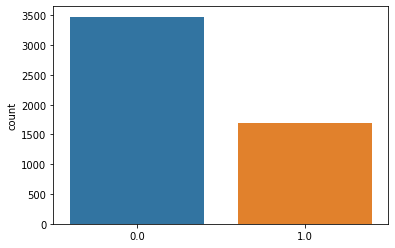

In [104]:
sns.countplot(prediction)

In [105]:
ss.head()

,ID,target
0,009D84L,0
1,01DO2EQ,0
2,01QM0NU,0
3,024NJLZ,0
4,02BYET3,0


In [106]:
sub_file = ss.copy()

In [107]:
sub_file.target = prediction

In [108]:
sub_file.to_csv('base_model_pred_file.csv',index=False)